# Aircraft Purchase Analysis Project

## Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase


## Objective.

In order to anaylize the difference in aircraft safety. We first must determine which aircrafts cause the most accidents, we will do so by determining the following:

* Analyzing the amount of different accidents fatal, serious, Non-Fatal
* Aircraft damage
* Injury Severity
* Engine Types
* Aircraft Category
* Weather Condition

I'll first proceed by installing the neccessary libraries needed to complete these objectives

## Import neccessary libraries from python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Extract
Extract the data required, found in the NTSB database.

In [2]:
# extract the data from the 'Aviation Data' 
data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')

C:\Users\omend\AppData\Local\Temp\ipykernel_35468\1917207079.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')


In [3]:
#print the dataframe
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

To help us better understanf the information within this DataFrame. Let's look at the info provided

In [4]:
#print the information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Let's take a look at some of the columns we intend to target as an independent variable, and decide how many missing values are located for each element in the DataFrame

In [5]:
#print the values of the columns
data['Injury.Severity'].values

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', ..., 'Non-Fatal', nan, 'Minor'],
      dtype=object)

# Establishing missing values from our independent and dependent variable

We will determing the amount of missing values and determine the correct course for manipulating the data. Let's start by finding the missing values within the data

Let's see which category would be best: **Injury Severity vs. Total Fatal Injuries, Total Serious Injuries, and Total Minor Injuries** or **Injury Severity vs Aircraft Damage**

* Check the amount of missing values per element, and xompare it to the best solution
* Ocne compared, we'll decide on the best route to take for the missing values

In [6]:
#evaluate how many missing values are in each column
data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

Based off the information we see that there are missing items within the injury severity, and aircraft damage. Let's take a look at all possible columns that can be considered an independent and dependent vairable for this data.

### Independent Variables
* Injury Severity
* Aircraft Damage
* Total Fatal Injuries
* Total Serious Injuries
* Total Minor Injuries
* Total Uninjured

### Dependent Variables
* Make
* Model
* Number of Engines
* Engine Type
* Weather Condition
* Aircraft Category

In [7]:
#create a function that helps count
def count_na_values(data):
    '''Takes a DataFrame (data) as input and calculates the count of NaN values for each specified column.
        Returns a tuple containing the count'''
    columns_to_check = ['Injury.Severity', 'Make', 'Aircraft.damage', 'Aircraft.Category', 'Engine.Type', 'Number.of.Engines','Model','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Weather.Condition']
    na_counts = [data[col].isna().sum() for col in columns_to_check]
    return tuple(na_counts)

missing_values = count_na_values(data)
missing_values

(1000, 63, 3194, 56602, 7096, 6084, 92, 11401, 12510, 11933, 5912, 4492)

We are left with a tuple, within this tuple are the values missing from each column specified above.

Based off the information we see that there are missing items within the injury severity, total fatal injuries, total serious injuries, total minor injuries, total uninjured, and aircraft damage.

I'll explore these columns, lets create a function that will provide us with the total number of categories within each columns

In [8]:
def count_categories(data, column_name):
    '''Provides a count of each element within the specified column. Converting the results into a
        dictionary for easy inspection'''
    if column_name in data.columns:
        return data[column_name].value_counts().to_dict()
    else:
        return f"This column does not exist within the dataframe"
    

In [9]:
injury_severity_count = count_categories(data,'Injury.Severity')
injury_severity_count

{'Non-Fatal': 67357,
 'Fatal(1)': 6167,
 'Fatal': 5262,
 'Fatal(2)': 3711,
 'Incident': 2219,
 'Fatal(3)': 1147,
 'Fatal(4)': 812,
 'Fatal(5)': 235,
 'Minor': 218,
 'Serious': 173,
 'Fatal(6)': 161,
 'Unavailable': 96,
 'Fatal(7)': 56,
 'Fatal(8)': 51,
 'Fatal(10)': 32,
 'Fatal(9)': 18,
 'Fatal(14)': 11,
 'Fatal(11)': 10,
 'Fatal(13)': 9,
 'Fatal(12)': 8,
 'Fatal(18)': 5,
 'Fatal(20)': 5,
 'Fatal(15)': 5,
 'Fatal(25)': 4,
 'Fatal(23)': 4,
 'Fatal(19)': 3,
 'Fatal(16)': 3,
 'Fatal(34)': 3,
 'Fatal(17)': 3,
 'Fatal(104)': 2,
 'Fatal(65)': 2,
 'Fatal(97)': 2,
 'Fatal(349)': 2,
 'Fatal(75)': 2,
 'Fatal(46)': 2,
 'Fatal(71)': 2,
 'Fatal(154)': 2,
 'Fatal(113)': 2,
 'Fatal(102)': 2,
 'Fatal(24)': 2,
 'Fatal(92)': 2,
 'Fatal(118)': 2,
 'Fatal(52)': 2,
 'Fatal(160)': 2,
 'Fatal(29)': 2,
 'Fatal(82)': 2,
 'Fatal(131)': 2,
 'Fatal(87)': 2,
 'Fatal(27)': 2,
 'Fatal(70)': 2,
 'Fatal(30)': 1,
 'Fatal(256)': 1,
 'Fatal(115)': 1,
 'Fatal(135)': 1,
 'Fatal(31)': 1,
 'Fatal(21)': 1,
 'Fatal(138)': 1,
 

Base off the information we see that there are missing values within the **injury severity**, and **aircraft damage** than there are within the **Total.Fatal.Injuries, Total.Serious.Injuries**, and **Total.Minor.Injuries**

Let's drop the missing values from the **Injury Severity Make, and Aircraft Damage** columns as those columns provide a lower perventage of missing values.

In [10]:
total_uninjured_count = count_categories(data,'Total.Serious.Injuries')
total_uninjured_count

{0.0: 63289,
 1.0: 9125,
 2.0: 2815,
 3.0: 629,
 4.0: 258,
 5.0: 78,
 6.0: 41,
 7.0: 27,
 9.0: 16,
 10.0: 13,
 8.0: 13,
 13.0: 9,
 11.0: 6,
 26.0: 5,
 14.0: 5,
 12.0: 5,
 20.0: 3,
 25.0: 3,
 28.0: 3,
 21.0: 2,
 59.0: 2,
 50.0: 2,
 17.0: 2,
 47.0: 2,
 137.0: 1,
 19.0: 1,
 161.0: 1,
 27.0: 1,
 35.0: 1,
 67.0: 1,
 33.0: 1,
 88.0: 1,
 125.0: 1,
 53.0: 1,
 34.0: 1,
 41.0: 1,
 18.0: 1,
 63.0: 1,
 55.0: 1,
 23.0: 1,
 43.0: 1,
 39.0: 1,
 45.0: 1,
 44.0: 1,
 16.0: 1,
 60.0: 1,
 106.0: 1,
 81.0: 1,
 15.0: 1,
 22.0: 1}

In [11]:
data.dropna(subset=['Injury.Severity', 'Make', 'Aircraft.damage','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'], inplace=True)

Check the df again to make sure the changes took place

In [12]:
data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     32
Country                     200
Latitude                  49372
Longitude                 49372
Airport.Code              30596
Airport.Name              28253
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         44767
Registration.Number         220
Make                          0
Model                        34
Amateur.Built                 1
Number.of.Engines          3366
Engine.Type                4207
FAR.Description           44998
Schedule                  62069
Purpose.of.flight          2806
Air.carrier               56720
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          2500
Broad.phase.of.flight     23731
Report.Status              4873
Publication.Date          12788
dtype: i

In [13]:
make_count = count_categories(data,'Make')
make_count

{'Cessna': 17982,
 'Piper': 9775,
 'CESSNA': 4749,
 'Beech': 3416,
 'PIPER': 2769,
 'Bell': 1628,
 'BEECH': 1004,
 'Grumman': 974,
 'Mooney': 854,
 'Bellanca': 742,
 'Boeing': 705,
 'Hughes': 625,
 'Robinson': 580,
 'BELL': 552,
 'Schweizer': 485,
 'Air Tractor': 426,
 'Aeronca': 401,
 'BOEING': 395,
 'Champion': 366,
 'Maule': 332,
 'Rockwell': 295,
 'Aero Commander': 291,
 'Hiller': 286,
 'Stinson': 286,
 'De Havilland': 268,
 'Aerospatiale': 263,
 'Taylorcraft': 262,
 'Mcdonnell Douglas': 262,
 'ROBINSON': 251,
 'Luscombe': 250,
 'North American': 236,
 'MOONEY': 235,
 'ROBINSON HELICOPTER': 218,
 'AIR TRACTOR INC': 217,
 'CIRRUS DESIGN CORP': 215,
 'Enstrom': 202,
 'Grumman American': 177,
 'Douglas': 176,
 'ROBINSON HELICOPTER COMPANY': 175,
 'Ayres': 158,
 'BELLANCA': 157,
 'AERONCA': 149,
 'MAULE': 144,
 'SCHWEIZER': 140,
 'HUGHES': 132,
 'Pitts': 131,
 'Ercoupe (eng & Research Corp.)': 131,
 'EUROCOPTER': 127,
 'Lake': 119,
 'Sikorsky': 110,
 'Swearingen': 109,
 'Fairchild': 10

As shown above, there are discrepencies between makes as some Aicraft amkes are capitalized, some are lower cased, and some are title cased

Let's alter the case with data, so that all information is unified

In [14]:
#Let's change the case for the categories to Title case 
data['Make'] = data['Make'].str.title()
data['Make']

0                           Stinson
1                             Piper
3                          Rockwell
6                            Cessna
7                            Cessna
                    ...            
88869                         Piper
88873            Cirrus Design Corp
88876                    Swearingen
88877                        Cessna
88886    American Champion Aircraft
Name: Make, Length: 71171, dtype: object

In [15]:
make_count = count_categories(data,'Make')
make_count

{'Cessna': 22731,
 'Piper': 12544,
 'Beech': 4420,
 'Bell': 2180,
 'Boeing': 1100,
 'Mooney': 1089,
 'Grumman': 1051,
 'Bellanca': 899,
 'Robinson': 831,
 'Hughes': 757,
 'Schweizer': 625,
 'Aeronca': 550,
 'Air Tractor': 514,
 'Maule': 476,
 'Champion': 456,
 'Stinson': 377,
 'Aero Commander': 359,
 'Luscombe': 343,
 'Hiller': 323,
 'Taylorcraft': 323,
 'Rockwell': 317,
 'North American': 313,
 'Mcdonnell Douglas': 312,
 'Aerospatiale': 302,
 'De Havilland': 299,
 'Enstrom': 249,
 'Robinson Helicopter': 223,
 'Air Tractor Inc': 218,
 'Cirrus Design Corp': 216,
 'Douglas': 197,
 'Robinson Helicopter Company': 182,
 'Grumman American': 179,
 'Ayres': 179,
 'Eurocopter': 166,
 'Sikorsky': 165,
 'Pitts': 144,
 'Swearingen': 137,
 'Ercoupe (Eng & Research Corp.)': 135,
 'Lake': 133,
 'Vans': 127,
 'Cirrus': 125,
 'Fairchild': 124,
 'Waco': 116,
 'Mitsubishi': 113,
 'Embraer': 112,
 'Schleicher': 111,
 'Let': 110,
 'Burkhart Grob': 101,
 'Helio': 99,
 'Ryan': 97,
 'Socata': 95,
 'Learjet': 

We run into a similar issue with the **'Fatal'** category within the **Injury Severity** column

Let's combine all **Fatal** elements in the **Injury Severity** column. Before we do so, the fatal category has a number of repeated inputs that have parantheses following the entry. To eliminate any confusion, I will proceed to replace all rows that have **Fatal** under one category

In [16]:
data['Injury.Severity']

0         Fatal(2)
1         Fatal(4)
3         Fatal(2)
6         Fatal(4)
7        Non-Fatal
           ...    
88869    Non-Fatal
88873    Non-Fatal
88876    Non-Fatal
88877        Minor
88886    Non-Fatal
Name: Injury.Severity, Length: 71171, dtype: object

In [17]:
#replacing the () followed by any number for elements within the injury severity column, regex, removes the parantheses from fatal 
data['Injury.Severity'].replace(regex='\((\d+)\)', value= '', inplace=True)

In [18]:
data['Injury.Severity']

0            Fatal
1            Fatal
3            Fatal
6            Fatal
7        Non-Fatal
           ...    
88869    Non-Fatal
88873    Non-Fatal
88876    Non-Fatal
88877        Minor
88886    Non-Fatal
Name: Injury.Severity, Length: 71171, dtype: object

In [19]:
#reassign injury_severity_count to accept the changes
injury_severity_count = count_categories(data,'Injury.Severity')
injury_severity_count

{'Non-Fatal': 55287,
 'Fatal': 14502,
 'Incident': 1018,
 'Minor': 204,
 'Serious': 151,
 'Unavailable': 9}

In [20]:
aircraft_damage_count = count_categories(data,'Aircraft.damage')
aircraft_damage_count

{'Substantial': 53281, 'Destroyed': 15706, 'Minor': 2092, 'Unknown': 92}

We'll remove any category that that 'Unknown' within the 'Aircraft_damage' column

In [21]:
data.drop(data[data['Aircraft.damage'] == 'Unknown'].index, inplace=True)

In [22]:
aircraft_damage_count = count_categories(data,'Aircraft.damage')
aircraft_damage_count

{'Substantial': 53281, 'Destroyed': 15706, 'Minor': 2092}

In [23]:
data.dropna(subset='Aircraft.damage', inplace=True)

Once we clean the column up. I want to group the injury type by make of the aircraft. Assessing which models have had fatal, serious, minor, Non-Fatal

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71079 entries, 0 to 88886
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                71079 non-null  object 
 1   Investigation.Type      71079 non-null  object 
 2   Accident.Number         71079 non-null  object 
 3   Event.Date              71079 non-null  object 
 4   Location                71047 non-null  object 
 5   Country                 70879 non-null  object 
 6   Latitude                21735 non-null  object 
 7   Longitude               21735 non-null  object 
 8   Airport.Code            40532 non-null  object 
 9   Airport.Name            42887 non-null  object 
 10  Injury.Severity         71079 non-null  object 
 11  Aircraft.damage         71079 non-null  object 
 12  Aircraft.Category       26312 non-null  object 
 13  Registration.Number     70859 non-null  object 
 14  Make                    71079 non-null  obj

I noticed that the **Event.Date** column is currently a object dtype. Let's modify that column to reflect the correct data type

In [25]:
data['Event_Date'] = pd.to_datetime(data['Event.Date'])
data['Event_Date']

0       1948-10-24
1       1962-07-19
3       1977-06-19
6       1981-08-01
7       1982-01-01
           ...    
88869   2022-12-13
88873   2022-12-14
88876   2022-12-15
88877   2022-12-16
88886   2022-12-26
Name: Event_Date, Length: 71079, dtype: datetime64[ns]

In [26]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948-10-24
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962-07-19
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977-06-19
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981-08-01
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022-12-14
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,2022-12-15
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,2022-12-16


#### Let's save the modified data frame

In [27]:
data.to_csv('./data/AviationData_copy.csv', index=False)

## Finding the percentage of Injury type

Let's explore the amount the Fatal injuries, Non-Fatal injuries, and Minor injuries percentages occurred throughout each incident.

In [28]:
def damage_percentage_per_injury(data, injury_type):
    total_instances = len(data['Injury.Severity'])
    total = sum(data['Injury.Severity'] == injury_type)
    percentage = round(total/total_instances * 100, 2)
    return percentage

In [29]:
fatal_results = damage_percentage_per_injury(data,'Fatal')
print(f"The total percentage of aircraft that have had a fatal outcome: {fatal_results}%")

The total percentage of aircraft that have had a fatal outcome: 20.37%


In [30]:
non_fatal_results = damage_percentage_per_injury(data,'Non-Fatal')
print(f"The total percentage of aircraft that have had a non-fatal outcome: {non_fatal_results}%")

The total percentage of aircraft that have had a non-fatal outcome: 77.7%


In [31]:
minor_results = damage_percentage_per_injury(data,'Minor')
print(f"The total percentage of aircraft that have had a minor outcome: {minor_results}%")

The total percentage of aircraft that have had a minor outcome: 0.28%


In [32]:
serious_results = damage_percentage_per_injury(data,'Serious')
print(f"The total percentage of aircraft that have had a serious outcome: {serious_results}%")

The total percentage of aircraft that have had a serious outcome: 0.21%


In [33]:
fatal = data[data['Injury.Severity'] == 'Fatal']
fatal['Injury.Severity']

0        Fatal
1        Fatal
3        Fatal
6        Fatal
13       Fatal
         ...  
88838    Fatal
88842    Fatal
88843    Fatal
88845    Fatal
88846    Fatal
Name: Injury.Severity, Length: 14478, dtype: object

In [34]:
#groups the DataFrame data by the columns 'Make' and 'Injury.Severity' and calculates
#the size (count) of each group, resetting the index of the resulting DataFrame
# grouped again by 'Injury.Severity', and for each group, the maximum size is calculated.

injury_type = data.groupby(['Injury.Severity']).size().reset_index().groupby('Injury.Severity').max()

In [35]:
injury_type = injury_type.rename(columns={0: 'Count'})

In [36]:
injury_type

,Count
Injury.Severity,
Fatal,14478
Incident,1018
Minor,200
Non-Fatal,55227
Serious,147
Unavailable,9


In [37]:
#print the indexes for the for injury type df
injury_type.index

Index(['Fatal', 'Incident', 'Minor', 'Non-Fatal', 'Serious', 'Unavailable'], dtype='object', name='Injury.Severity')

In [38]:
#print the name of columns for the for injury type df
injury_type.columns

Index(['Count'], dtype='object')

We would like check and see the number of Fatal accidents vs Minor, Serious, Non-Fatal.

* **Fatal** -> Any injury resulting in death within 30 days of accidents

* **Incident** -> An occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations.

* **Serious** -> Serious injury means any injury which: (1) Requires hospitalization for more than 48 hours, commencing within 7 days from the date of the injury was received; (2) results in a fracture of any bone (except simple fractures of fingers, toes, or nose); (3) causes severe hemorrhages, nerve, muscle, or tendon damage; (4) involves any internal organ; or (5) involves second- or third-degree burns, or any burns affecting more than 5 percent of the body surface.

* **Minor** -> Not specified, although if an injury does not meet the criteria for another injury category

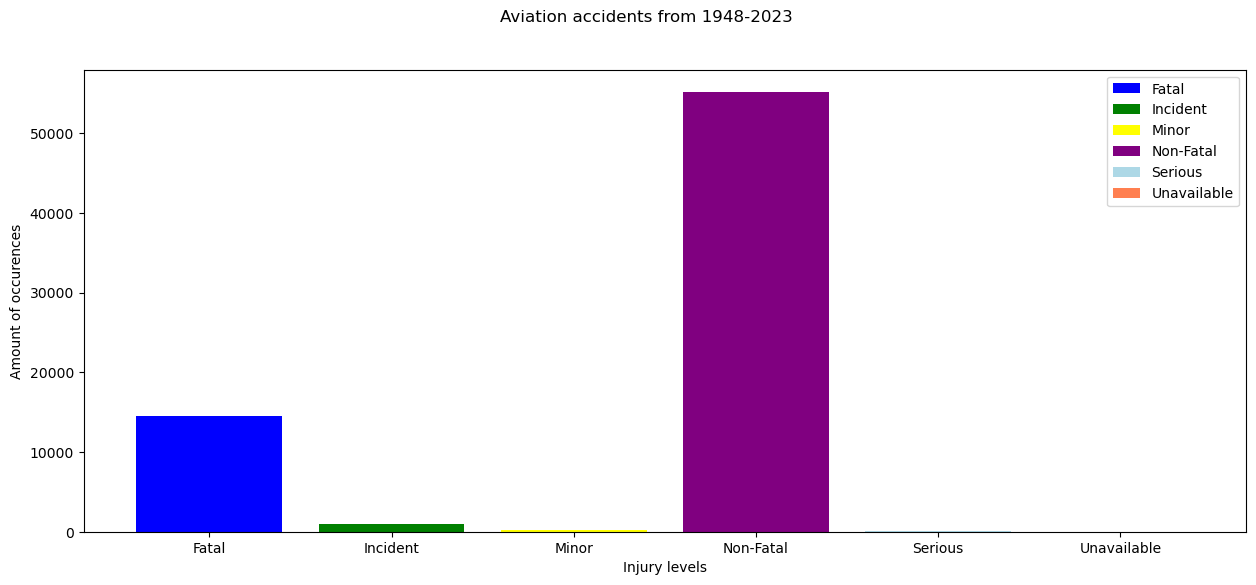

In [39]:
color = ['blue', 'green', 'yellow', 'purple', 'lightblue','coral']
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(injury_type.index, injury_type['Count'], color=color, label=injury_type.index)
# ax.plot(injury_type.index, injury_type[0], marker='o')
ax.set_xlabel('Injury levels')
ax.set_ylabel('Amount of occurences')
# ax.set_title('Aviation accidents from 1948-2020')
fig.suptitle('Aviation accidents from 1948-2023')
ax.legend()
plt.show;



Save the visualization

In [40]:
fig.savefig('./images/Aviation_accidents_from_1948_to_2023')

Checking the graph above. 

We can see that a large amount of accidents resulted in Non-Fatal injuries, and significant amount of aircrafts were considered to be 'Fatal'.

There are a number of aircrafts that have damage ranging from Destroyed, Substantial, Minor, and Unknown. Lets focus on gathering information on the aircrafts that have minor damages.

## NTSB and FAA information:

#### Definitions provided:

* **Destroyed** - if all of its primary structure is damaged to the extent that it would be impracticable to return the aircraft to an airworthy condition by repair.
* **Substantial** - damage means damage or failure which adversely affects the structural strength, performance, or flight characteristics of the aircraft, and which would normally require major repair or replacement of the affected component.
* **Minor** - means the aircraft either is in an airworthy condition or is restorable to airworthy condition by minor repairs.

#### Aircraft Damage

Let's explore Aircraft damage and find the percentage for those categories

We will check to see if there are any missing values stil within the column. Even though the missing values were removed earlier. Then check to see the values within the column

In [41]:
data['Aircraft.damage'].isna().sum()

0

In [42]:
#check the values within the 'Aircraft.damage column'
data['Aircraft.damage']

0          Destroyed
1          Destroyed
3          Destroyed
6          Destroyed
7        Substantial
            ...     
88869    Substantial
88873    Substantial
88876    Substantial
88877    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 71079, dtype: object

## Aricraft Damage visualization

In [43]:
damaged_aircrafts = data.groupby('Aircraft.damage').size().reset_index().groupby('Aircraft.damage').max()
type(damaged_aircrafts)
damaged_aircrafts = damaged_aircrafts.rename(columns={0: 'Count'})

In [44]:
damaged_aircrafts

,Count
Aircraft.damage,
Destroyed,15706
Minor,2092
Substantial,53281


In [45]:
damaged_aircrafts.to_csv('./data/damaged_aircrafts.csv', index=False)

In [46]:
def aircraft_damage_percentage(data, damage_type):
    """Finds the percentage for non-fatal aircraft damages"""
    column_length = len(data['Aircraft.damage'])
    total = data['Aircraft.damage'].str.count(damage_type).sum()
    percentage = round(total/column_length * 100, 2)
    return percentage

In [47]:
destroyed_percentage = aircraft_damage_percentage(data,'Destroyed')
print(f"Destroyed aircrafts: {destroyed_percentage}%")

Destroyed aircrafts: 22.1%


In [48]:
substantial_percentage = aircraft_damage_percentage(data, 'Substantial')
print(f"Substantial aircrafts: {substantial_percentage}%")

Substantial aircrafts: 74.96%


In [49]:
minor_percentage = aircraft_damage_percentage(data, 'Minor')
print(f"Minor damaged aircrafts: {minor_percentage}%")

Minor damaged aircrafts: 2.94%


In [50]:
unknown_percentage = aircraft_damage_percentage(data, 'Unknown')
print(f"Unknown aircrafts: {unknown_percentage}%")

Unknown aircrafts: 0.0%


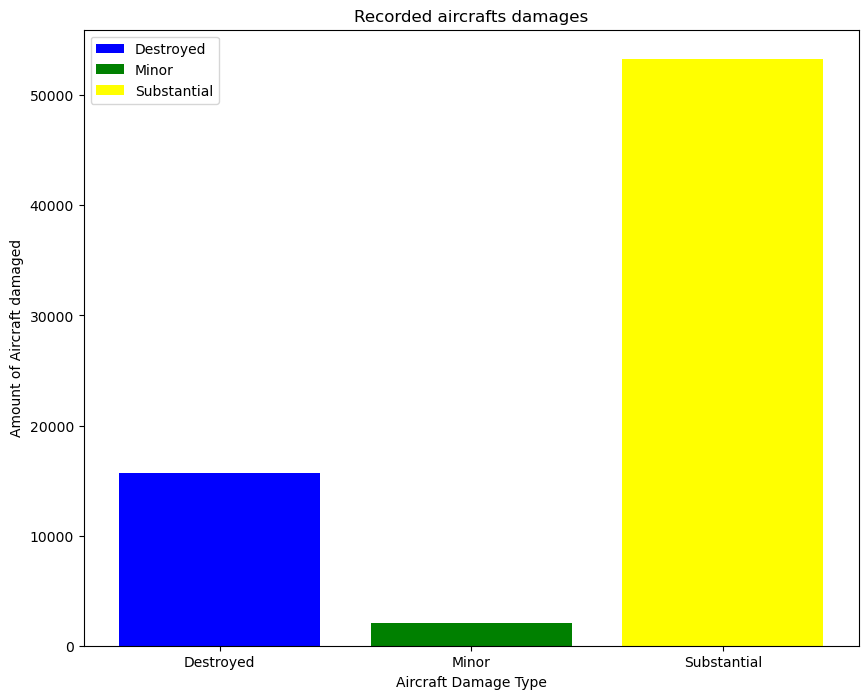

In [51]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(damaged_aircrafts.index, damaged_aircrafts['Count'], color=color, label=damaged_aircrafts.index)
ax.set_xlabel('Aircraft Damage Type')
ax.set_ylabel('Amount of Aircraft damaged')
ax.set_title('Recorded aircrafts damages')
ax.legend()
plt.show();

In [52]:
fig.savefig('./images/Aviation_damage')

As you can see, the amount of aircrafts that have **substantial damage equate to 74.96%** of the amount of planes. While aircrafts considered **destroyed amount to 22.1%**. Aircrafts with **minor damage equate for 2.94%** of the total amount of planes damaged. Let's focus on the aircrafts that have been in non-fatal accidents and are reported with minor damages

## Damage Aircraft Ratio

Plot the visualization and demonstrate the ratio of injuries based on the Aircraft Damage


In [53]:
damaged_aircrafts

,Count
Aircraft.damage,
Destroyed,15706
Minor,2092
Substantial,53281


In [54]:
def calculate_injury_ratio(data, damage_column, severity_column, injury_type):
    #calculate the ratio of specified injuried
    injury_count = sum(data[damage_column] == injury_type)
    total_injury_count = data[severity_column].count()
    
    #calculate and return the ratio
    if total_injury_count != 0:
        ratio = injury_count / total_injury_count
        return ratio
    else:
        return f"Total {severity_column} count is zero, cannot calculate ratio"

In [55]:
destroyed_ratio = calculate_injury_ratio(data,'Aircraft.damage','Injury.Severity','Destroyed')
destroyed_ratio

0.2209654046905556

In [56]:
minor_ratio = calculate_injury_ratio(data,'Aircraft.damage','Injury.Severity', 'Minor')
minor_ratio

0.029432040405745718

In [57]:
substantial_ratio = calculate_injury_ratio(data,'Aircraft.damage','Injury.Severity','Substantial')
substantial_ratio

0.7496025549036986

In [58]:
unknown_ratio = calculate_injury_ratio(data,'Aircraft.damage','Injury.Severity','Unknown')
unknown_ratio

0.0

## Damage Aircrafts Visualization

Plot the visualization and demonstrate the ratio of injuries based on the **Aircraft Damage**

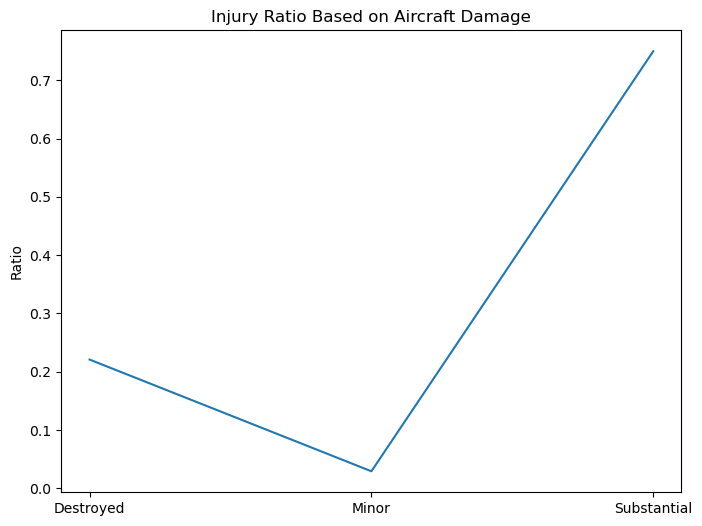

In [59]:
fig,ax = plt.subplots(figsize=(8,6))

ratios = [destroyed_ratio,minor_ratio,substantial_ratio]
ax.plot(damaged_aircrafts.index, ratios)
ax.set_ylabel('Ratio')
ax.set_title('Injury Ratio Based on Aircraft Damage')

plt.show()

The ratio of injuries by aircraft damage halps see the negative skew for each category, with the exception of the **Minor** category

In [60]:
fig.savefig('./images/Injury_ratio_aircraft_damage')

## Aircraft Damage by Number of Engines

In [61]:
data['Number.of.Engines'].fillna(float(round(data['Number.of.Engines'].mean())), inplace=True)
data['Number.of.Engines'].isna().sum()

0

In [62]:
engine_count = count_categories(data,'Number.of.Engines')
engine_count

{1.0: 61609, 2.0: 8093, 0.0: 839, 3.0: 276, 4.0: 259, 8.0: 2, 6.0: 1}

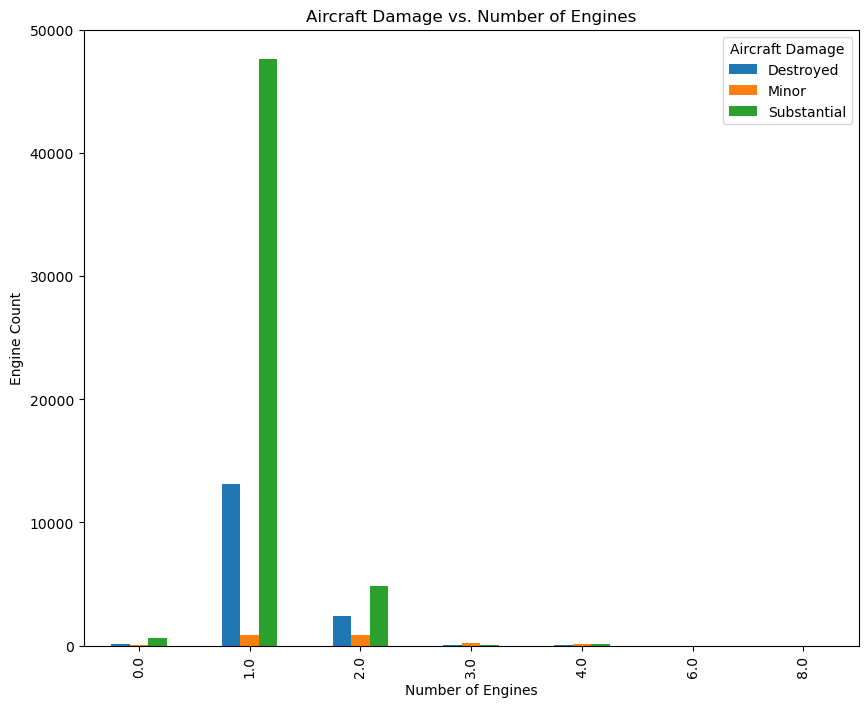

In [63]:
fig, ax = plt.subplots(figsize=(10,8))

# Group the data by 'Number.of.Engines' and 'Aircraft.damage', and count occurrences
grouped_df = data.groupby(['Number.of.Engines', 'Aircraft.damage']).size().unstack()

# Plot the grouped bar chart
# grouped_data.T.plot(kind='line', ax=ax, marker='o')
grouped_df.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Engine Count')
ax.set_title('Aircraft Damage vs. Number of Engines')

# Add legend
ax.legend(title='Aircraft Damage')


plt.show();

In [64]:
fig.savefig('./images/Aircraft_damage_vs_Number_of_engines')

In [65]:
grouped_df.to_csv('./data/ad_v_noe.csv', index=False)

In [66]:
# grouped_df.reset_index()
grouped_df

Aircraft.damage,Destroyed,Minor,Substantial
Number.of.Engines,,,
0.0,148.0,46.0,645.0
1.0,13091.0,883.0,47635.0
2.0,2398.0,875.0,4820.0
3.0,18.0,175.0,83.0
4.0,51.0,113.0,95.0
6.0,NaN,NaN,1.0
8.0,NaN,NaN,2.0


In [67]:
purpose_of_flight_count = count_categories(data, 'Purpose.of.flight')
purpose_of_flight_count

{'Personal': 41077,
 'Instructional': 8704,
 'Unknown': 5589,
 'Aerial Application': 4102,
 'Business': 3453,
 'Positioning': 1204,
 'Other Work Use': 934,
 'Ferry': 724,
 'Aerial Observation': 658,
 'Public Aircraft': 523,
 'Executive/corporate': 445,
 'Flight Test': 250,
 'Skydiving': 109,
 'External Load': 98,
 'Air Race show': 90,
 'Public Aircraft - Federal': 78,
 'Banner Tow': 76,
 'Public Aircraft - Local': 60,
 'Public Aircraft - State': 47,
 'Glider Tow': 43,
 'Firefighting': 31,
 'Air Drop': 7,
 'ASHO': 6,
 'PUBS': 4,
 'PUBL': 1}

In [68]:
# Group by 'Purpose.of.flight' and count occurrences
grouped_counts = data.groupby('Purpose.of.flight').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

grouped_counts

,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,ASHO,14.0,1.0,0.0,1.0
1,Aerial Application,448.0,541.0,665.0,2574.0
2,Aerial Observation,331.0,278.0,252.0,689.0
3,Air Drop,7.0,3.0,2.0,8.0
4,Air Race show,39.0,16.0,14.0,53.0
5,Banner Tow,15.0,26.0,5.0,40.0
6,Business,1977.0,735.0,927.0,4693.0
7,Executive/corporate,355.0,115.0,148.0,1120.0
8,External Load,31.0,23.0,27.0,52.0
9,Ferry,191.0,99.0,195.0,559.0


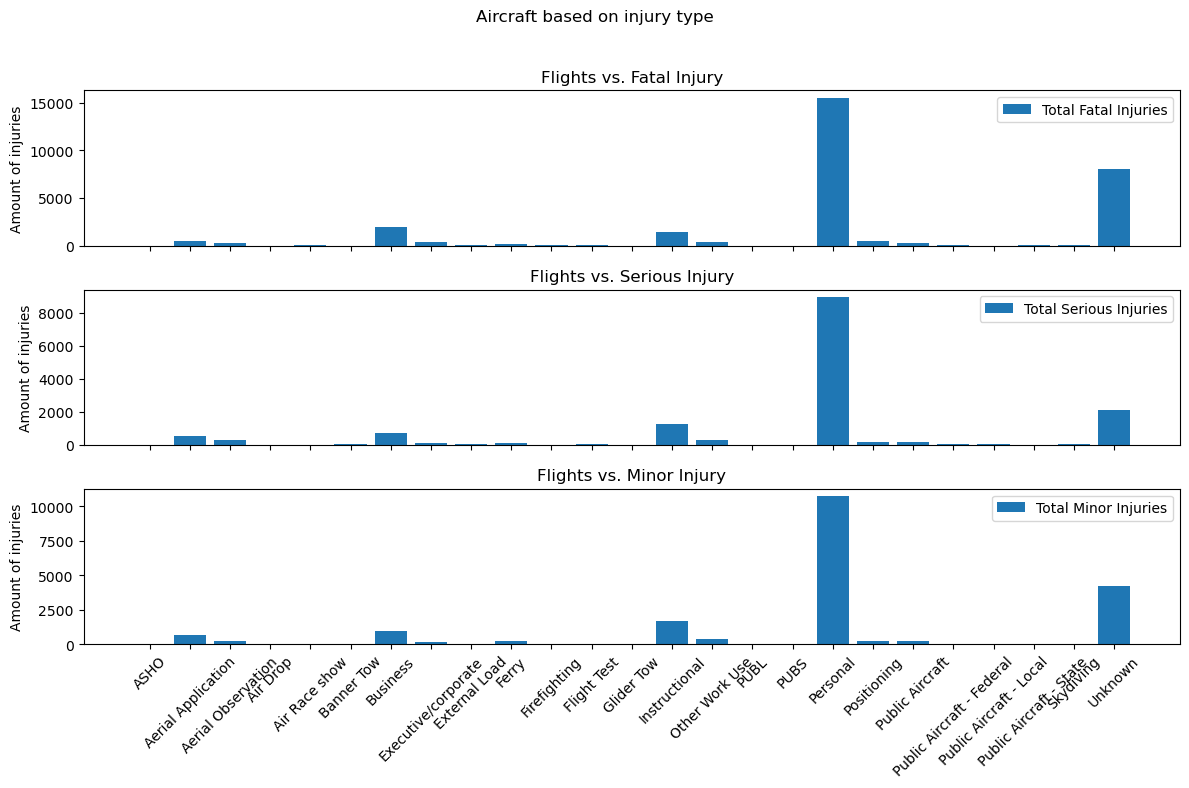

In [69]:

# Create subplots with 3 axes
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex='col')

# Plot Total Fatal Injuries
ax0.bar(grouped_counts['Purpose.of.flight'], grouped_counts['Total.Fatal.Injuries'], label='Total Fatal Injuries')
ax0.set_ylabel('Amount of injuries')
ax0.set_title('Flights vs. Fatal Injury')
ax0.legend()

# Plot Total Serious Injuries
ax1.bar(grouped_counts['Purpose.of.flight'], grouped_counts['Total.Serious.Injuries'], label='Total Serious Injuries')
ax1.set_ylabel('Amount of injuries')
ax1.set_title('Flights vs. Serious Injury')
ax1.legend()

# Plot Total Minor Injuries
ax2.bar(grouped_counts['Purpose.of.flight'], grouped_counts['Total.Minor.Injuries'], label='Total Minor Injuries')
ax2.set_ylabel('Amount of injuries')
ax2.set_title('Flights vs. Minor Injury')
ax2.legend()

# Set custom x-axis ticks and labels
custom_ticks = range(len(grouped_counts['Purpose.of.flight']))
plt.xticks(custom_ticks, grouped_counts['Purpose.of.flight'], rotation=45)

fig.suptitle('Aircraft based on injury type')

# Adjust layout to accommodate suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

In [70]:
fig.savefig('./images/Aircraft_based_on_injury_type')

In [71]:
data_engine_type = count_categories(data,'Engine.Type')
data_engine_type

{'Reciprocating': 58403,
 'Turbo Shaft': 2830,
 'Turbo Prop': 2471,
 'Unknown': 1646,
 'Turbo Fan': 1173,
 'Turbo Jet': 421,
 'Electric': 8,
 'NONE': 2,
 'Hybrid Rocket': 1,
 'Geared Turbofan': 1,
 'LR': 1,
 'UNK': 1}

In [72]:
data_injury_severity = count_categories(data,'Injury.Severity')
data_injury_severity

{'Non-Fatal': 55227,
 'Fatal': 14478,
 'Incident': 1018,
 'Minor': 200,
 'Serious': 147,
 'Unavailable': 9}

In [73]:
data['Engine.Type'].replace(r'UNK', 'Unknown', regex=True, inplace=True)

In [74]:
data_engine_type = count_categories(data,'Engine.Type')
data_engine_type

{'Reciprocating': 58403,
 'Turbo Shaft': 2830,
 'Turbo Prop': 2471,
 'Unknown': 1647,
 'Turbo Fan': 1173,
 'Turbo Jet': 421,
 'Electric': 8,
 'NONE': 2,
 'Hybrid Rocket': 1,
 'Geared Turbofan': 1,
 'LR': 1}

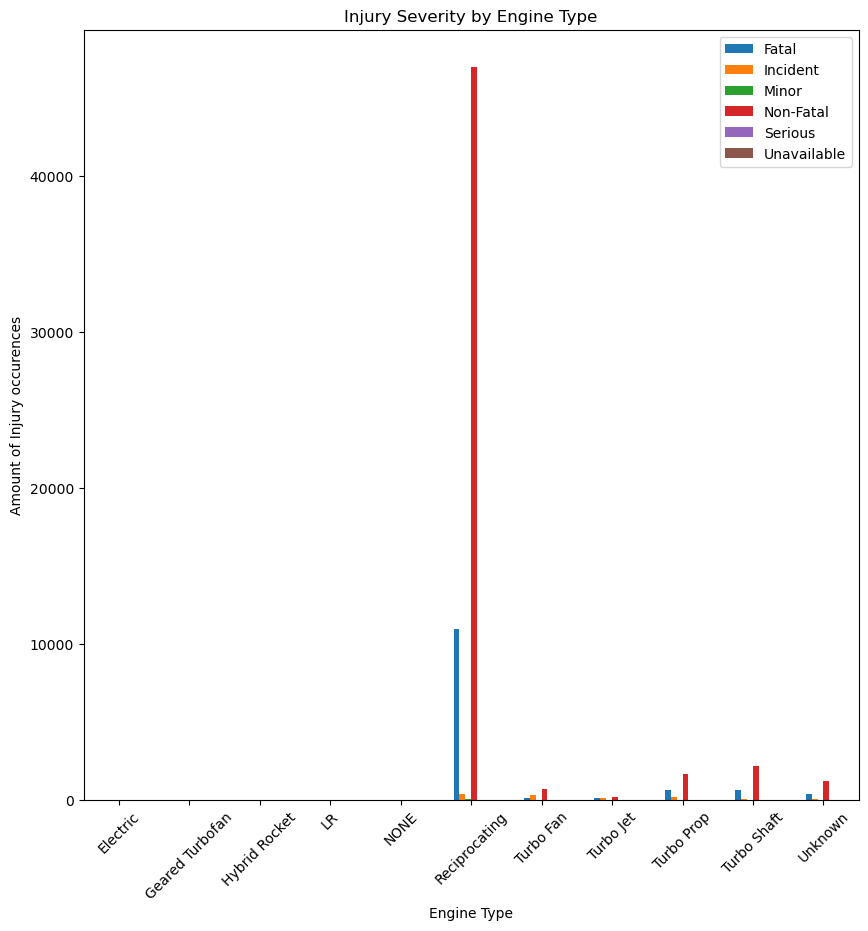

In [75]:
fig,ax = plt.subplots(figsize=(10,10))

grouped_columns = data.groupby(['Engine.Type','Injury.Severity']).size().unstack().reset_index()

# Plot each column as a bar
grouped_columns.set_index('Engine.Type').plot.bar(rot=45, ax=ax)

# Set labels and title
ax.set_xlabel('Engine Type')
ax.set_ylabel('Amount of Injury occurences')
ax.set_title('Injury Severity by Engine Type')
ax.set_xticks(range(len(grouped_columns['Engine.Type'])))
ax.set_xticklabels(grouped_columns['Engine.Type'], rotation=45)

# Add legend
ax.legend()

plt.show()

In [76]:
fig.savefig('./images/injury_severity_by_engine_type')

In [77]:
grouped_columns.to_csv('./data/injury_v_engine.csv', index=False)

In [78]:
grouped_columns

Injury.Severity,Engine.Type,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable
0,Electric,2.0,NaN,NaN,6.0,NaN,NaN
1,Geared Turbofan,NaN,NaN,NaN,1.0,NaN,NaN
2,Hybrid Rocket,1.0,NaN,NaN,NaN,NaN,NaN
3,LR,NaN,NaN,NaN,1.0,NaN,NaN
4,NONE,NaN,NaN,NaN,2.0,NaN,NaN
5,Reciprocating,10971.0,356.0,62.0,46990.0,22.0,2.0
6,Turbo Fan,143.0,316.0,NaN,714.0,NaN,NaN
7,Turbo Jet,102.0,110.0,NaN,209.0,NaN,NaN
8,Turbo Prop,616.0,178.0,2.0,1674.0,1.0,NaN
9,Turbo Shaft,642.0,26.0,6.0,2152.0,4.0,NaN


Finally, We will measure weather condition, and the amount of aircraft damage based off of wether conditions.

We will calcilate the amount of weather conditions, and aircraft damage

Let's check 'Weather condtion' and 'Aircraft damage'

In [79]:
weather = count_categories(data,'Weather.Condition')
weather

{'VMC': 62960, 'IMC': 4786, 'UNK': 693, 'Unk': 191}

In [80]:
aircraft_damage_count

{'Substantial': 53281, 'Destroyed': 15706, 'Minor': 2092}

Let's combine category 'Unk' with 'UNK' to remove any confusion

In [81]:
data['Weather.Condition'].replace(regex=r'\bUnk\b', value='UNK', inplace=True)


In [82]:
weather = count_categories(data,'Weather.Condition')
weather

{'VMC': 62960, 'IMC': 4786, 'UNK': 884}

In [83]:
damage = count_categories(data,'Aircraft.damage')
damage

{'Substantial': 53281, 'Destroyed': 15706, 'Minor': 2092}

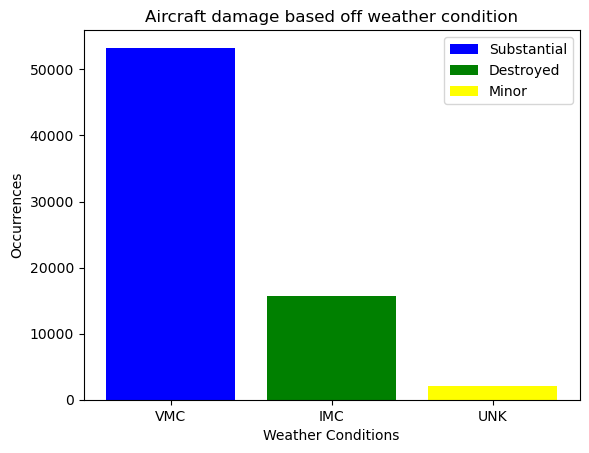

In [84]:
fig, ax = plt.subplots()
ax.bar(weather.keys(), damage.values(), color=color, label=damage.keys())
ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Occurrences')
ax.set_title('Aircraft damage based off weather condition')
ax.legend()
plt.show()

In [85]:
data.to_csv('./data/AviationData_copy.csv', index=False)

In [86]:
fig.savefig('./images/aircraft_damage_based_on_weather')

## Minor and Non-Fatal accidents
### Ratio between injury severity and aircraft damage

Using the copy of the data in the non_fatal_injuries df. We'll discover which aircrafts have minor damage


In [87]:
damaged_aircrafts

,Count
Aircraft.damage,
Destroyed,15706
Minor,2092
Substantial,53281


## Exploring Non-Fatal Injuries

Checking the graph above

We can see that a large amount of accidents resulted in **Non-Fatal**, and significant amount of aircrafts were considered **Fatal**

Let's examine which aircrafts had **Non-Fatal** accidents

We'll analyze the **Non-Fatal** first, and save it to a variable

In [88]:
non_fatal_injuries = data[data['Injury.Severity'] == 'Non-Fatal']
non_fatal_injuries['Injury.Severity'].values

array(['Non-Fatal', 'Non-Fatal', 'Non-Fatal', ..., 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal'], dtype=object)

In [89]:
non_fatal_injuries

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982-01-01
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982-01-01
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982-01-01
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982-01-01
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,NaN,NaN,TUSKEGEE,...,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88865,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,355745N,0835218W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,Knoxville Flight Training Academy,0.0,0.0,0.0,1.0,VMC,NaN,NaN,15-12-2022,2022-12-12
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022-12-14
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,2022-12-15


Next, we will assess aircraft damages obtained by each aircraft. Gathering information from which aircrafts are still usable. We'll start by assessing the aircrafts damage reported on each aircraft within the copy of the non-fatal df

In [90]:
non_fatal_injuries.to_csv('./data/non_fatal_injuries.csv', index=False)

In [91]:
non_fatal_injuries['Aircraft.damage'].isna().sum()

0

In [92]:
#check the values within the 'Aircraft.damage column'
non_fatal_injuries['Aircraft.damage']

7        Substantial
8        Substantial
9        Substantial
10       Substantial
11       Substantial
            ...     
88865    Substantial
88869    Substantial
88873    Substantial
88876    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 55227, dtype: object

In [93]:
non_fatal_count = count_categories(non_fatal_injuries, 'Aircraft.damage')
# non_fatal_injuries['Aircraft.damage'].values
non_fatal_count

{'Substantial': 48998, 'Destroyed': 5248, 'Minor': 981}

In [94]:
destroyed_percentage = aircraft_damage_percentage(non_fatal_injuries,'Destroyed')
print(f"Destroyed aircrafts: {destroyed_percentage}%")

Destroyed aircrafts: 9.5%


In [95]:
substantial_percentage = aircraft_damage_percentage(non_fatal_injuries, 'Substantial')
print(f"Substantial aircrafts: {substantial_percentage}%")

Substantial aircrafts: 88.72%


In [96]:
minor_percentage = aircraft_damage_percentage(non_fatal_injuries, 'Minor')
print(f"Minor damaged aircrafts: {minor_percentage}%")

Minor damaged aircrafts: 1.78%


In [97]:
unknown_percentage = aircraft_damage_percentage(non_fatal_injuries, 'Unknown')
print(f"Unknown aircrafts: {unknown_percentage}%")

Unknown aircrafts: 0.0%


In [98]:
non_fatal_damaged_aircrafts = non_fatal_injuries.groupby('Aircraft.damage').size().reset_index().groupby('Aircraft.damage').max()

non_fatal_damaged_aircrafts = damaged_aircrafts.rename(columns={0: 'Count'})

In [99]:
non_fatal_damaged_aircrafts

,Count
Aircraft.damage,
Destroyed,15706
Minor,2092
Substantial,53281


In [100]:
non_fatal_damaged_aircrafts.to_csv('./data/non_fatal_damaged_aircrafts.csv', index=False)

### Exploring aircrafts with Minor damage

using the copy of the data in the non_fatal_injuries df. We'll discover which aircrafts have minor damage.

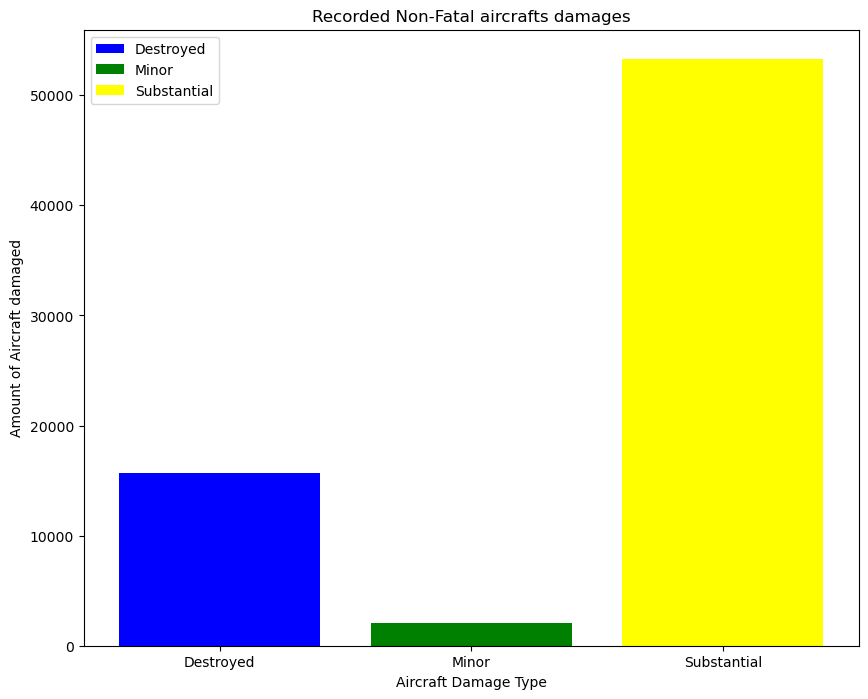

In [101]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(non_fatal_damaged_aircrafts.index, non_fatal_damaged_aircrafts['Count'], color=color, label=damaged_aircrafts.index)
ax.set_xlabel('Aircraft Damage Type')
ax.set_ylabel('Amount of Aircraft damaged')
ax.set_title('Recorded Non-Fatal aircrafts damages')
ax.legend()
plt.show();

In [102]:
minor_damaged_aircrafts = non_fatal_injuries[non_fatal_injuries['Aircraft.damage'] == 'Minor']

minor_damaged_aircrafts

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,United Airlines Inc.,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,1982-02-03
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,1982-02-06
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,NaN,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,1982-02-06
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,NaN,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,1982-03-11
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,1982-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,GRANT AVIATION INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,2022-07-28
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,2022-08-31
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,2022-10-01
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,NaN,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,2022-10-27


Save the df

In [103]:
minor_damaged_aircrafts.to_csv('./data/minor_aircraft_damage.csv', index=False)

In [104]:
fig.savefig('./images/recorded_nonfatal_damages')

In [105]:
minor_damaged_aircrafts.shape

(981, 32)

In [106]:
type(minor_damaged_aircrafts)

pandas.core.frame.DataFrame

In [107]:
minor_damaged_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 230 to 88795
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                981 non-null    object        
 1   Investigation.Type      981 non-null    object        
 2   Accident.Number         981 non-null    object        
 3   Event.Date              981 non-null    object        
 4   Location                980 non-null    object        
 5   Country                 980 non-null    object        
 6   Latitude                469 non-null    object        
 7   Longitude               469 non-null    object        
 8   Airport.Code            603 non-null    object        
 9   Airport.Name            620 non-null    object        
 10  Injury.Severity         981 non-null    object        
 11  Aircraft.damage         981 non-null    object        
 12  Aircraft.Category       668 non-null    object     

In [108]:
severity_count = count_categories(minor_damaged_aircrafts, 'Injury.Severity')
severity_count
# minor_damaged_aircrafts['Injury.Severity'].head(50).values

{'Non-Fatal': 981}

The total amount of aircrafts that have minor damage and have had non-fatal occurrences has reduced the copy of the df to **981** rows

In [109]:
minor_damaged_aircrafts

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,United Airlines Inc.,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,1982-02-03
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,1982-02-06
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,NaN,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,1982-02-06
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,NaN,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,1982-03-11
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,1982-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,GRANT AVIATION INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,2022-07-28
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,2022-08-31
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,2022-10-01
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,NaN,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,2022-10-27


We'll continue by aggregating the amount of aircrafts that have minor and non-fatal incidents

In [110]:
grouped_data = minor_damaged_aircrafts.groupby(['Make', 'Injury.Severity','Aircraft.damage','Aircraft.Category', 'Engine.Type']).agg(Number_of_Aircrafts=('Aircraft.damage', 'size')).reset_index()
grouped_data


,Make,Injury.Severity,Aircraft.damage,Aircraft.Category,Engine.Type,Number_of_Aircrafts
0,2007 Savage Air Llc,Non-Fatal,Minor,Airplane,Turbo Prop,1
1,Aero Vodochody,Non-Fatal,Minor,Airplane,Turbo Fan,1
2,Aerospatiale,Non-Fatal,Minor,Helicopter,Turbo Shaft,1
3,Aerotek Inc,Non-Fatal,Minor,Airplane,Reciprocating,1
4,Agusta,Non-Fatal,Minor,Helicopter,Turbo Shaft,5
...,...,...,...,...,...,...
147,Ttx Air Llc,Non-Fatal,Minor,Airplane,Turbo Prop,1
148,Ultramagic Sa,Non-Fatal,Minor,Airplane,Unknown,1
149,Univar,Non-Fatal,Minor,Airplane,Reciprocating,1
150,Vans Aircraft Inc,Non-Fatal,Minor,Airplane,Reciprocating,1


In [112]:
manufacturer = count_categories(grouped_data, 'Make')
manufacturer

{'Bombardier': 4,
 'Cessna': 4,
 'Embraer': 3,
 'Boeing': 3,
 'Piper': 2,
 'Bombardier Inc': 2,
 'Dehavilland': 2,
 'Cirrus': 2,
 'Beech': 2,
 'Cirrus Design Corp': 2,
 'Mcdonnell Douglas': 2,
 'Hawker Beechcraft Corp.': 2,
 'Airbus Industrie': 2,
 'Raytheon Aircraft Company': 2,
 'Airbus': 2,
 'Douglas': 2,
 'Mitsubishi': 2,
 'Morrison Rocky V': 1,
 'North American': 1,
 'New Piper Aircraft Inc': 1,
 'P&M Aviation Ltd': 1,
 'Piaggio': 1,
 'Pilatus': 1,
 'Pilatus Aircraft Ltd': 1,
 'Mueller Michael Walter': 1,
 '2007 Savage Air Llc': 1,
 'Mooney': 1,
 'Mischanko': 1,
 'Md Helicopter Inc': 1,
 'Md Helicopter': 1,
 'Mcdonnell-Douglas': 1,
 'Mcdonnell Douglas Helicopter': 1,
 'Mcdonnell Douglas Aircraft Co': 1,
 'Martin Charles A': 1,
 'Liberty Aerospace Incorporated': 1,
 'Learjet': 1,
 'Krusmark David Homer': 1,
 'Israel Aircraft Industries': 1,
 'Indus Aviation Inc': 1,
 'Iai': 1,
 'Md Helicopters Inc': 1,
 'Raytheon': 1,
 'Powrachute Corp': 1,
 'Sikorsky': 1,
 'Vans Aircraft Inc': 1,


Save the grouped df 

In [113]:
grouped_data.to_csv('./data/grouped_data_copy.csv', index=False)

Now that we have a copy of the original dataframe. Let's find the aircrafts that are categorized as 'Airplane' to narrow down the analysis for safety features per aircrafts.

In [114]:
airplanes = grouped_data.loc[(grouped_data['Aircraft.Category'] == 'Airplane') & (grouped_data['Number_of_Aircrafts'] >= 5), ['Make','Injury.Severity','Aircraft.Category','Aircraft.damage','Engine.Type','Number_of_Aircrafts']]
airplanes

,Make,Injury.Severity,Aircraft.Category,Aircraft.damage,Engine.Type,Number_of_Aircrafts
8,Airbus,Non-Fatal,Airplane,Minor,Turbo Fan,16
10,Airbus Industrie,Non-Fatal,Airplane,Minor,Turbo Fan,5
16,Beech,Non-Fatal,Airplane,Minor,Reciprocating,8
17,Beech,Non-Fatal,Airplane,Minor,Turbo Prop,9
23,Boeing,Non-Fatal,Airplane,Minor,Turbo Fan,55
30,Bombardier Inc,Non-Fatal,Airplane,Minor,Turbo Fan,10
37,Cessna,Non-Fatal,Airplane,Minor,Reciprocating,42
38,Cessna,Non-Fatal,Airplane,Minor,Turbo Fan,9
45,Cirrus Design Corp,Non-Fatal,Airplane,Minor,Reciprocating,8
63,Embraer,Non-Fatal,Airplane,Minor,Turbo Fan,11


I noticed that there are two entries for the **Airbus** manufacturer. I'll combine both categories under one category

In [124]:
# using the .replace method on the grouped_data df, we'll replace the category 'Airbus Industrie' with 'Airbus'
grouped_data['Make'].replace({'Airbus Industrie': 'Airbus', 'Beech': 'Beech','Cessna': 'Cessna'}, regex=True, inplace=True)

In [125]:
airplanes = grouped_data.loc[(grouped_data['Aircraft.Category'] == 'Airplane') & (grouped_data['Number_of_Aircrafts'] >= 5), ['Make','Injury.Severity','Aircraft.Category','Aircraft.damage','Engine.Type','Number_of_Aircrafts']]
airplanes

,Make,Injury.Severity,Aircraft.Category,Aircraft.damage,Engine.Type,Number_of_Aircrafts
8,Airbus,Non-Fatal,Airplane,Minor,Turbo Fan,16
10,Airbus,Non-Fatal,Airplane,Minor,Turbo Fan,5
16,Beech,Non-Fatal,Airplane,Minor,Reciprocating,8
17,Beech,Non-Fatal,Airplane,Minor,Turbo Prop,9
23,Boeing,Non-Fatal,Airplane,Minor,Turbo Fan,55
30,Bombardier Inc,Non-Fatal,Airplane,Minor,Turbo Fan,10
37,Cessna,Non-Fatal,Airplane,Minor,Reciprocating,42
38,Cessna,Non-Fatal,Airplane,Minor,Turbo Fan,9
45,Cirrus Design Corp,Non-Fatal,Airplane,Minor,Reciprocating,8
63,Embraer,Non-Fatal,Airplane,Minor,Turbo Fan,11


In [126]:
make_with_five_or_more_aircrafts =  airplanes[(airplanes['Number_of_Aircrafts'] >= 5) & (airplanes['Aircraft.Category'] == 'Airplane')]
# make_with_five_or_more_aircrafts

In [129]:
# make_over_10 = grouped_data[grouped_data['Number_of_Aircrafts'] >= 10]
make_with_five_or_more_aircrafts
make_with_five_or_more_aircrafts.to_csv('./data/nonfatal_minor_damaged_aircrafts_over_five.csv', index=False)

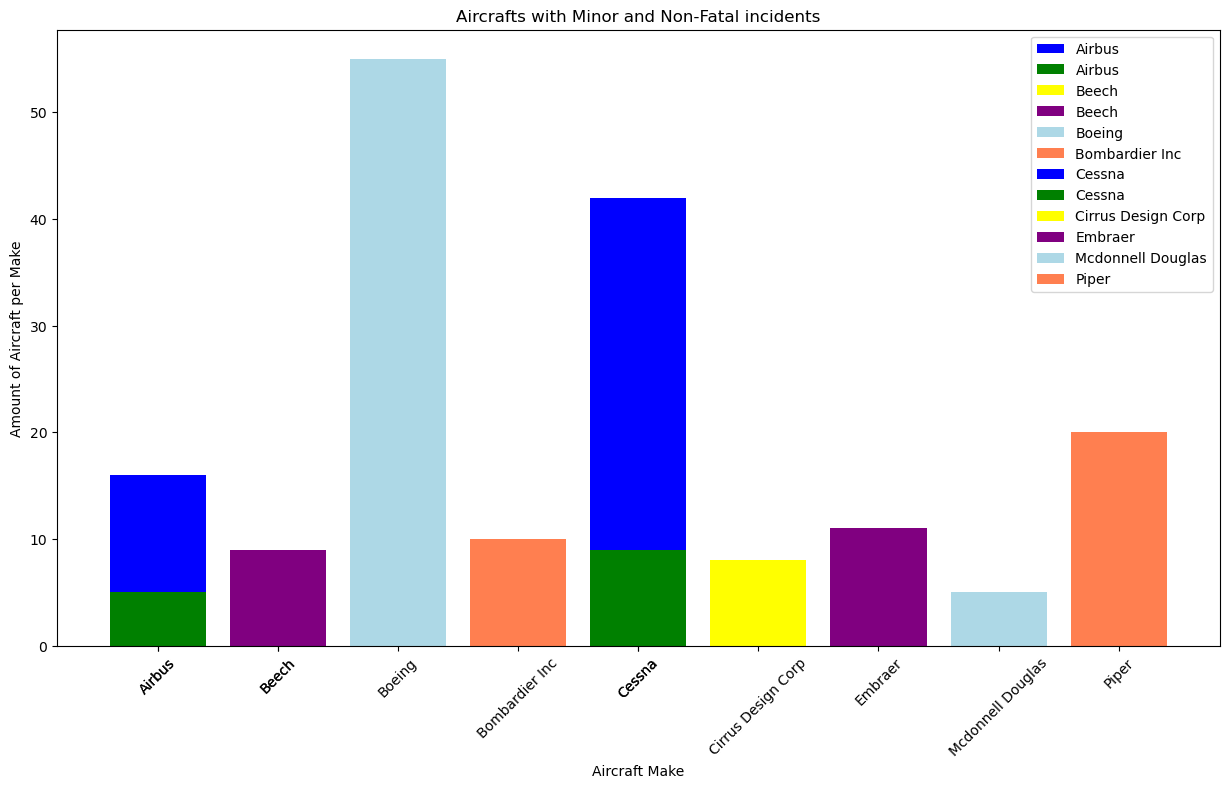

In [130]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(make_with_five_or_more_aircrafts['Make'], make_with_five_or_more_aircrafts['Number_of_Aircrafts'], label=make_with_five_or_more_aircrafts['Make'], color=color)

ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Amount of Aircraft per Make')
ax.set_title('Aircrafts with Minor and Non-Fatal incidents')
ax.set_xticks(make_with_five_or_more_aircrafts['Make'])  # Set the actual values for x-axis ticks
ax.set_xticklabels(make_with_five_or_more_aircrafts['Make'], rotation=45)  # Set the labels for x-axis ticks
ax.legend()

plt.show()

In [131]:
fig.savefig('./images/Aircrafts_with_minor_and_fatal_incidents')

Based on the visualization above, we can see that throughout the dataframe we have a number of aircrafts that fall under the categories of **Non-Fatal** injuries and **Minor** damage. Boeing and Cessna are aircrafts that are considered to fall under these categories.

### Safety features with minor damaged aircrafts

Next, we'll explore the safety features for each aircrafts to establish which aircrafts are considered safe for the NTSB and FAA.

Let's start with the **minor_damaged_aircrafts** df

In [132]:
minor_damaged_aircrafts

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,United Airlines Inc.,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,1982-02-03
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,1982-02-06
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,NaN,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,1982-02-06
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,NaN,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,1982-03-11
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,1982-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,GRANT AVIATION INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,2022-07-28
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,2022-08-31
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,2022-10-01
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,NaN,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,2022-10-27


In [133]:
minor_damaged_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 230 to 88795
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                981 non-null    object        
 1   Investigation.Type      981 non-null    object        
 2   Accident.Number         981 non-null    object        
 3   Event.Date              981 non-null    object        
 4   Location                980 non-null    object        
 5   Country                 980 non-null    object        
 6   Latitude                469 non-null    object        
 7   Longitude               469 non-null    object        
 8   Airport.Code            603 non-null    object        
 9   Airport.Name            620 non-null    object        
 10  Injury.Severity         981 non-null    object        
 11  Aircraft.damage         981 non-null    object        
 12  Aircraft.Category       668 non-null    object     

Within the dataframe, we can identify safety features by using the **Number of Engines** , **Engine Type**, and **Weather Condition**

Let's start by analyzing the number of engines. We'll see how many missing values there are within the column.

In [134]:
minor_damaged_aircrafts['Number.of.Engines'].head(10)

230     3.0
242     1.0
244     1.0
535     2.0
746     0.0
935     1.0
961     1.0
1031    1.0
1036    1.0
1112    0.0
Name: Number.of.Engines, dtype: float64

In [135]:
engine_count = count_categories(data,'Number.of.Engines')
engine_count

{1.0: 61609, 2.0: 8093, 0.0: 839, 3.0: 276, 4.0: 259, 8.0: 2, 6.0: 1}

Let's identify any missing values within the column

In [136]:
minor_damaged_aircrafts['Number.of.Engines'].isna().sum()

0

We can see that there are a few values missing within the column. We can replace the values with the mean of the total column.

In [137]:
len(minor_damaged_aircrafts['Number.of.Engines'])

981

The amount of missing values appears to be a small amount. Instead of removing the values, let's fill the missing values to with the mean of the values within the columns

In [138]:
engine_number_mean = float(round(minor_damaged_aircrafts['Number.of.Engines'].mean()))
engine_number_mean

1.0

In [139]:
minor_damaged_aircrafts['Number.of.Engines'].fillna(engine_number_mean, inplace=True)

C:\Users\omend\AppData\Local\Temp\ipykernel_35468\2120467351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts['Number.of.Engines'].fillna(engine_number_mean, inplace=True)


In [140]:
minor_damaged_aircrafts['Number.of.Engines'].isna().sum()

0

In [141]:
#resassing the engine count to confirm the changes
engine_count = count_categories(data,'Number.of.Engines')

engine_count

{1.0: 61609, 2.0: 8093, 0.0: 839, 3.0: 276, 4.0: 259, 8.0: 2, 6.0: 1}

In [157]:
minor_damaged_aircrafts.replace({'Airbus Industrie': 'Airbus','Boeing':'Boeing'}, regex=True, inplace=True)
number_of_engines = minor_damaged_aircrafts.groupby(['Make','Aircraft.Category','Number.of.Engines']).agg(Make_count=('Make', 'size')).reset_index()
commercial_aircrafts = number_of_engines[(number_of_engines['Number.of.Engines'] >= 2) & (number_of_engines['Aircraft.Category'] == 'Airplane') & (number_of_engines['Make_count'] >= 5)]
# number_of_engines
commercial_aircrafts
commercial_aircrafts.to_csv('./data/commercial_aircraft_make_gt.csv', index=False)

C:\Users\omend\AppData\Local\Temp\ipykernel_35468\3282489283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts.replace({'Airbus Industrie': 'Airbus','Boeing':'Boeing'}, regex=True, inplace=True)


In [158]:
unique_engine_count=commercial_aircrafts['Number.of.Engines'].unique()
unique_engine_count

array([2., 4.])

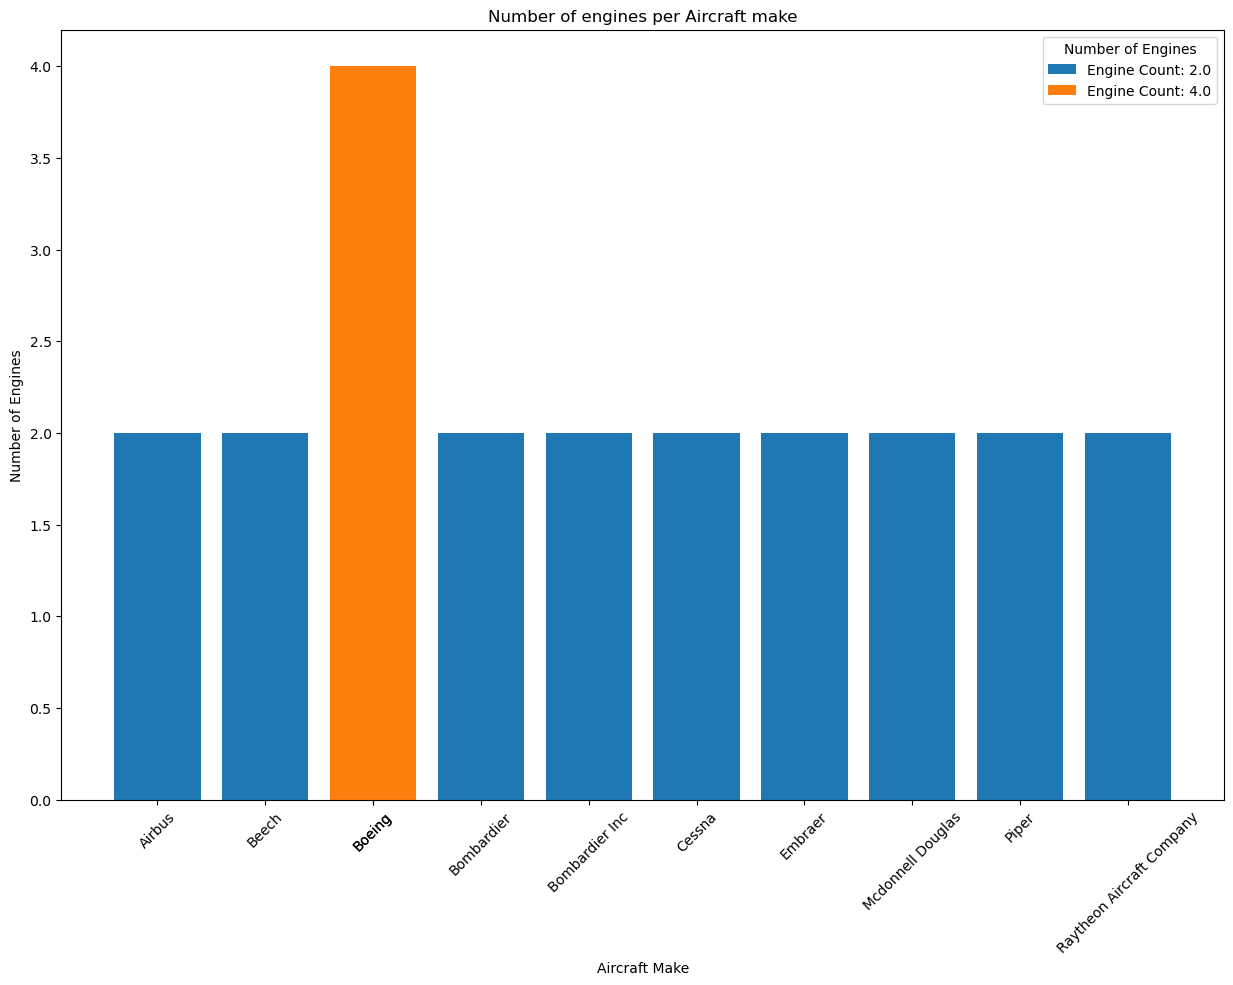

In [159]:
fig, ax = plt.subplots(figsize=(15,10))


colors = ['red','green']
# Iterate over the unique values
for engine_count in unique_engine_count:
    # Filter the DataFrame based on the current unique value
    filtered_data = commercial_aircrafts[commercial_aircrafts['Number.of.Engines'] == engine_count]
     # Create a histogram of the filtered data
#     plt.hist(filtered_data['Make'], bins=10, alpha=0.5, label=f'Engine Count: {engine_count}', edgecolor='black')
    plt.bar(filtered_data['Make'], filtered_data['Number.of.Engines'], label=f"Engine Count: {engine_count}")
# ax.bar(commercial_aircrafts['Make'], commercial_aircrafts['Make_count'], label=commercial_aircrafts['Number.of.Engines'].unique(),color=colors)
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Number of Engines')
ax.set_title('Number of engines per Aircraft make')
ax.set_xticks(commercial_aircrafts['Make'])
ax.set_xticklabels(commercial_aircrafts['Make'], rotation=45)
ax.set_label('Label via method')
ax.legend(title='Number of Engines')
plt.show();


In [160]:
fig.savefig('./images/Number_of_engines_per_aircraft')

Commercial aircrafts are required to have 4 engines, fora number of safety reasons. Transporting large number of passengers, and cargo/luggage. In the event of engine failure, the other engines can provide additional support to keep the plane stable. Based on these findings, aircrafts that provide the best possbility are boeing aircrafts.

For private use, which require aircrafts to have 2+ engines. Based off of the findings, we can see that Airbus, Beech, Boeing, Bomabardier, Cessna, Embraer, Mcdonnell Douglas, and Piper have the most available aircrafts and have minor, non-fatal incidents. 

In [161]:
minor_damaged_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 230 to 88257
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                709 non-null    object        
 1   Investigation.Type      709 non-null    object        
 2   Accident.Number         709 non-null    object        
 3   Event.Date              709 non-null    object        
 4   Location                708 non-null    object        
 5   Country                 708 non-null    object        
 6   Latitude                354 non-null    object        
 7   Longitude               354 non-null    object        
 8   Airport.Code            509 non-null    object        
 9   Airport.Name            520 non-null    object        
 10  Injury.Severity         709 non-null    object        
 11  Aircraft.damage         709 non-null    object        
 12  Aircraft.Category       409 non-null    object     

Next we'll explore the Engine Type for each aircraft

In [162]:
# minor_damaged_aircrafts['Engine.Type'].head(50)
engine_type = count_categories(minor_damaged_aircrafts,'Engine.Type')
engine_type

{'Reciprocating': 335,
 'Turbo Fan': 183,
 'Turbo Prop': 64,
 'Unknown': 57,
 'Turbo Shaft': 40,
 'Turbo Jet': 29,
 'Geared Turbofan': 1}

There are 5 types of Engines within the **minor_damaged_aircrafts** df: 

* **Reciprocating Engine** - Also known as a piston engine or internal combustion engine, it is a heat engine using fuel ignition created inside a single or multiple reciprocating pistons to produce high temperatures and high pressure, which generates rotating motion.

* **Turbodrop Engine** - A turboprop engine is a type of aircraft engine offering the low maintenance and high speeds of a gas turbine engine with the reliability of a propeller drive system.

* **Turboshaft Engine** - Turboshaft engines are lightweight and powerful aircraft engines commonly used in real-world applications requiring fuel-efficient, robust, and compact powerplants like tanks, helicopters, hovercrafts, and auxiliary power units.

* **Turbojet Engine** - A turbojet engine is a type of aircraft engine whose primary means of propulsion is the rearward discharge of hot exhaust gas. It is an airbreathing jet engine that works by sucking atmospheric air into a compressor. 

* **TurboFan Engine** - Another air-breathing engine, the turbofan engine, is a type of aircraft engine commonly found on large commercial airliners.

Next, we'll identify the amount of missing values within the Engine Type column, and decide what would be best method to handle the missing the missing values.

In [163]:
# data['Engine.Type'].isna().sum()
minor_damaged_aircrafts['Engine.Type']

230          Turbo Fan
242      Reciprocating
244      Reciprocating
535      Reciprocating
746            Unknown
             ...      
86220       Turbo Prop
87304    Reciprocating
87412    Reciprocating
87932      Turbo Shaft
88257    Reciprocating
Name: Engine.Type, Length: 709, dtype: object

Now that we have removed the missing values from the engine type within a copy. Let's add it to the make_over_ten_aircrafts dataframe 

In [164]:
minor_damaged_aircrafts['Engine.Type'].isna().sum()

0

In [165]:
# minor_damaged_aircrafts[(minor_damaged_aircrafts['Make'] == 'Airbus') & (minor_damaged_aircrafts['Engine.Type'] == 'Reciprocating')]
minor_damaged_aircrafts.loc[(minor_damaged_aircrafts['Make'] == 'Airbus') & (minor_damaged_aircrafts['Engine.Type'] == 'Turbo Fan')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date
19134,20001213X32573,Accident,MIA88FA032,1987-11-11,ATLANTIC OCEAN,ATLANTIC OCEAN,NaN,NaN,NaN,NaN,...,Pan American World Airways (dba: Pan Am),0.0,3.0,32.0,105.0,VMC,Cruise,Probable Cause,31-03-1989,1987-11-11
38971,20001208X05168,Accident,MIA96FA064,1996-01-17,ATLANTIC OCEAN,ATLANTIC OCEAN,NaN,NaN,NaN,NaN,...,NaN,0.0,3.0,17.0,248.0,IMC,Descent,Probable Cause,03-04-1997,1996-01-17
39104,20001208X05312,Accident,NYC96LA063,1996-02-20,"JAMAICA, NY",United States,NaN,NaN,JFK,JOHN F KENNEDY,...,NaN,0.0,2.0,32.0,163.0,VMC,Standing,Probable Cause,10-12-1996,1996-02-20
41114,20001208X07347,Accident,NYC97LA040,1997-01-07,ATLANTIC OCEAN,ATLANTIC OCEAN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,5.0,259.0,VMC,Cruise,Probable Cause,10-04-1998,1997-01-07
64119,20080312X00305,Incident,DCA08IA044,2008-02-26,"Jackson, WY",United States,433622N,1104419W,JAC,Jackson Hole,...,United Air Lines,0.0,1.0,0.0,124.0,VMC,NaN,the loss of braking action on the left main la...,25-09-2020,2008-02-26
64995,20080729X01123,Incident,DEN08IA123,2008-07-24,"Denver, CO",United States,395142N,1044023W,DEN,Denver International,...,Centre Air Canada,0.0,0.0,0.0,99.0,VMC,NaN,Total failure of the right inboard tire. Contr...,25-09-2020,2008-07-24
67466,20091117X55556,Incident,CEN10IA053,2009-11-15,"Kansas City, MO",United States,391752N,0944250W,MCI,Kansas City International,...,Frontier Airlines,0.0,0.0,0.0,130.0,VMC,NaN,The in-flight engine ingestion of one or more ...,25-09-2020,2009-11-15
67710,20100310X91532,Incident,ENG10WA019,2010-02-09,"Cologne-Bonn Airport, Germany",Germany,NaN,NaN,MNB,Cologne-Bonn Airport,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,03-11-2020,2010-02-09
67954,20100503X82523,Incident,ENG10IA026,2010-04-05,"Newark, NJ",United States,404422N,0074109W,EWR,Newark International Airport,...,"JetBlue Airways, Inc.",0.0,0.0,0.0,140.0,NaN,NaN,The separation of both halves of the left engi...,25-09-2020,2010-04-05
68263,20100606X02721,Accident,ERA10LA299,2010-06-05,"Charlotte, NC",United States,351249N,0805656W,CLT,Charlotte/Douglas Internationa,...,US AIRWAYS INC,0.0,0.0,0.0,454.0,VMC,NaN,The Airbus A330 flight crew's failure to maint...,25-09-2020,2010-06-05


In [166]:
minor_damaged_aircrafts.dropna(subset=['Engine.Type'], inplace=True)

C:\Users\omend\AppData\Local\Temp\ipykernel_35468\3576547356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts.dropna(subset=['Engine.Type'], inplace=True)


In [153]:
minor_damaged_aircrafts['Engine.Type'].isna().sum()

0

In [167]:
engine_types = minor_damaged_aircrafts.groupby(['Make','Engine.Type','Number.of.Engines']).agg(Total_aircrafts=('Make', 'size')).reset_index()
engines_amount_df = engine_types[engine_types['Total_aircrafts'] >= 5]
engines_amount_df
engines_amount_df.to_csv('./data/engine_total.csv', index=False)

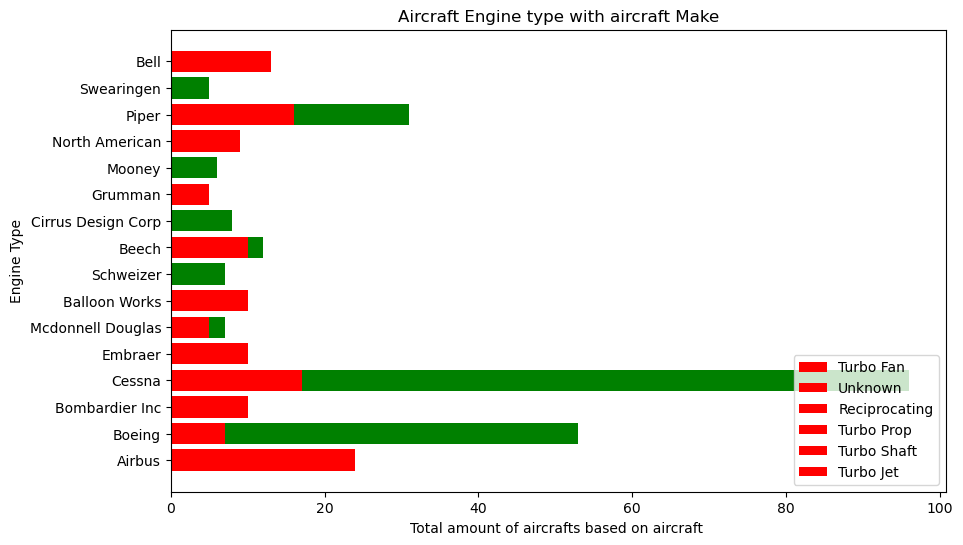

In [168]:
fig, ax = plt.subplots(figsize=(10,6))


for i, engine_type in enumerate(engines_amount_df['Engine.Type'].unique()):
    subset_df = engines_amount_df[engines_amount_df['Engine.Type'] == engine_type]
    ax.barh(subset_df['Make'], subset_df['Total_aircrafts'], label=engine_type, color=colors)
ax.set_title('Aircraft Engine type with aircraft Make')
ax.set_xlabel('Total amount of aircrafts based on aircraft ')
ax.set_ylabel('Engine Type')
ax.legend(loc='lower right')
plt.show();

In [138]:
fig.savefig('./images/Aircraft_Engines_with_aircraft_make')

As we can see aircrafts that provide the most available engine types are boeing, and cessna. Having **Turbo Prop** and **Turbo Fan** engines.

The final assessment will be the weather conditions for each aircraft

In [139]:
minor_damaged_aircrafts['Weather.Condition']

230      IMC
242      VMC
244      VMC
535      IMC
746      VMC
        ... 
86220    VMC
87304    VMC
87412    VMC
87932    VMC
88257    VMC
Name: Weather.Condition, Length: 709, dtype: object

**VMC** conditions describe the weather conditions and situations in which a pilot can sufficiently and safely maintain visuals of all other aircraft and the terrain around them. The factors that affect VMC include visibility, cloud ceilings, and cloud clearances. During VMC, VFR flight is permitted.

**IMC** conditions describe a situation in which visibility and the weather require the pilot to rely on their instruments, and thus conduct an IFR flight. This is typically done when flying through clouds, as well as general bad weather. Pilots are sometimes trained to fly in such conditions to teach them to rely on instrument indications.

In [140]:
minor_damaged_aircrafts['Weather.Condition'].isna().sum()

54

In [141]:
minor_damaged_aircrafts.dropna(subset=['Weather.Condition'], inplace=True)

C:\Users\omend\AppData\Local\Temp\ipykernel_27436\2063450494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts.dropna(subset=['Weather.Condition'], inplace=True)


In [142]:
minor_damaged_aircrafts['Weather.Condition'].isna().sum()

0

In [169]:
weather_df = minor_damaged_aircrafts.groupby(['Make','Weather.Condition']).agg(Total_weather_condition=('Make', 'size')).reset_index()
total_weather_aircrafts = weather_df[(weather_df['Total_weather_condition'] > 10)]
total_weather_aircrafts
total_weather_aircrafts.to_csv('./data/total_weather_conditions_per_aircraft.csv', index=False)

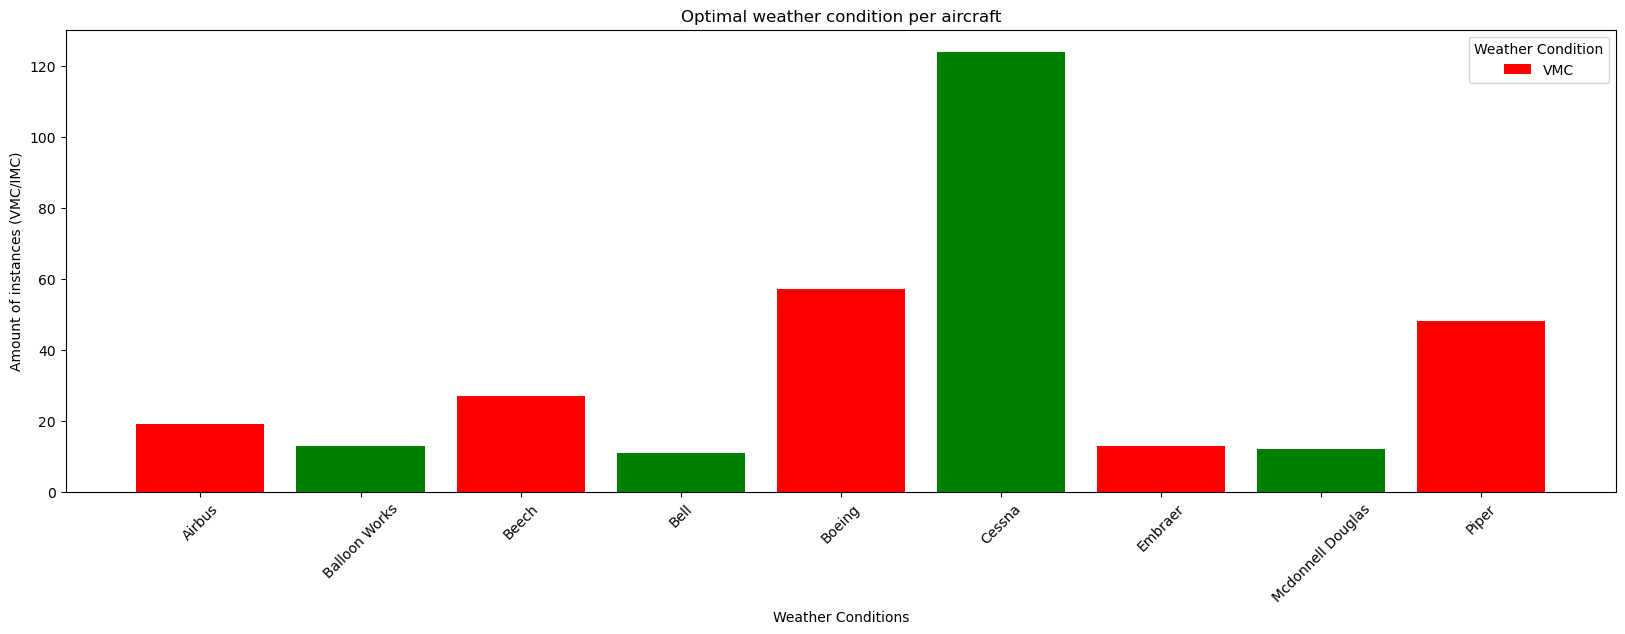

In [171]:
fig, ax = plt.subplots(figsize=(20,6))

# colors = ['red','green']
weather_conditions = sorted(total_weather_aircrafts['Weather.Condition'].unique())

for i, condition in enumerate(weather_conditions):
    subset_df = total_weather_aircrafts[total_weather_aircrafts['Weather.Condition'] == condition]
    ax.bar(subset_df['Make'], subset_df['Total_weather_condition'], label=condition, color=colors)
    
# ax.bar(total_weather_aircrafts['Make'], total_weather_aircrafts['Total_weather_make'], label=sorted(total_weather_aircrafts['Weather.Condition']), color=colors)
ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Amount of instances (VMC/IMC)')
ax.set_title('Optimal weather condition per aircraft')
ax.set_xticks(total_weather_aircrafts['Make'])
ax.set_xticklabels(total_weather_aircrafts['Make'], rotation=45)
ax.legend(title='Weather Condition')
plt.show();

In [172]:
fig.savefig('./images/Aircraft_within_certain_condtions')

Based off the visualization and data provided above, aircrafts that encountered weather conditions **VMC**:

* Beech
* Bell
* Boeing
* Cessna
* Cirrus Design Corp

All other aircrafts that fall under the scope of **IMC** does not neccessarily eliminate the aircraft but I decided to focus on aircrafts that have more than one instance experiencing weather conditions.

# Conclusion

Based off of the ananlysis of this dataset. Assessing certain aspects of wach aircrafts ranging from Injury-Severity to the Weather Condition. After creating a copy of the original dataframe to ensure that we have aircrafts that fall under **Minor** and **Non-Fatal** categories.

The safest number of engines, engine type, and weather conditions

We are able to conclude that the best aircrafts availble for commercial and private use would be as follows:
* 1. Boeing
* 2. Cessna
* 3. Airbus/Piper
